# Exercício 1

Obtenha as séries de preços ajustados de Petrobrás PN (PETR4.SA), Lojas Renner (LREN3.SA), Ambev (ABEV3.SA), da ETF SMAL11 (SMAL11.SA) e do Índice IBOVESPA (^BVSP), para o período de 2010-12-31 a 2020-01-01 (10 anos de dados). Estas séries possuem valores faltantes, é necessário fazer o tratamento. Para cada uma destas séries faça:
1. Limpeza dos dados faltantes
1. Cálculo do log-retorno diário
1. Cálculo do retorno esperado anualizado
1. Cálculo da volatilidade esperada anualizada
1. Cálculo do log-retorno anual
1. Cálculo da rentabilidade a partir do log-retorno anual

In [104]:
import pandas as pd
import numpy as np
import yfinance as yf

In [105]:
symbol = 'PETR4.SA LREN3.SA ABEV3.SA SMAL11.SA ^BVSP'

In [112]:
data = yf.download(symbol, start='2010-12-30', end='2020-01-01')

[*********************100%***********************]  5 of 5 completed


## Limpeza dos dados faltantes

In [113]:
data['Adj Close'].shape

(2232, 5)

In [114]:
data['Adj Close'].dropna().shape

(2225, 5)

In [115]:
p = data['Adj Close'].dropna()

In [116]:
p.head()

,ABEV3.SA,LREN3.SA,PETR4.SA,SMAL11.SA,^BVSP
Date,,,,,
2010-12-30,6.045817,7.446164,21.904737,70.919998,69305.0
2011-01-03,6.059748,7.537259,21.671963,71.470001,69962.0
2011-01-04,6.061141,7.432962,21.591696,70.940002,70318.0
2011-01-05,5.948304,7.373550,21.848547,70.919998,71091.0
2011-01-06,5.892582,7.195315,21.760258,70.129997,70579.0


## Cálculo do log-retorno diário

In [117]:
r = np.log(p).diff()

## Cálculo do retorno esperado anualizado

In [118]:
AnualizedReturns = r.mean() * 252

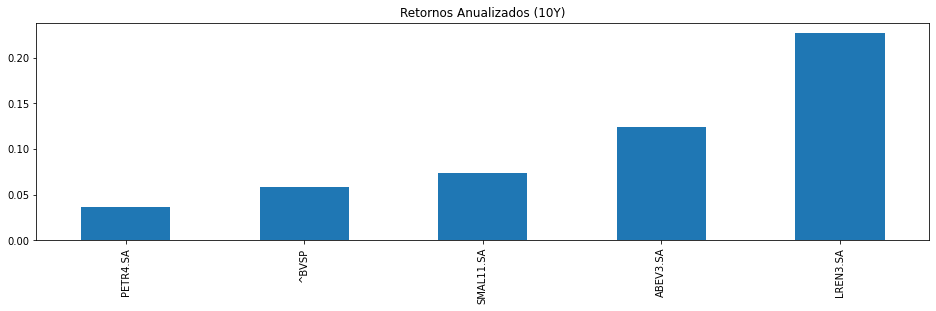

In [119]:
AnualizedReturns.sort_values().plot(kind='bar', figsize=(16,4), title='Retornos Anualizados (10Y)');

## Cálculo da volatilidade esperada anualizada

In [120]:
AnualizedVolatility = r.std() * np.sqrt(252)

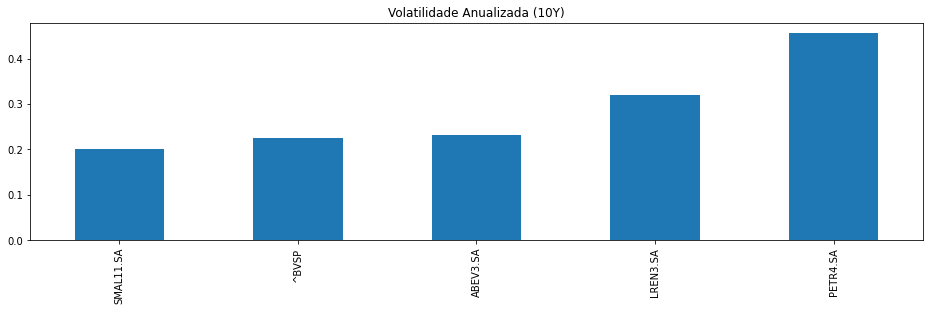

In [121]:
AnualizedVolatility.sort_values().plot(kind='bar', figsize=(16,4), title='Volatilidade Anualizada (10Y)');

## Cálculo do CAGR (Compound Annual Growth Rate)

<https://en.wikipedia.org/wiki/Compound_annual_growth_rate>

In [122]:
x = p.iloc[[-1,0]]
cagr = np.power(x.iloc[0] / x.iloc[1], 1/10) - 1

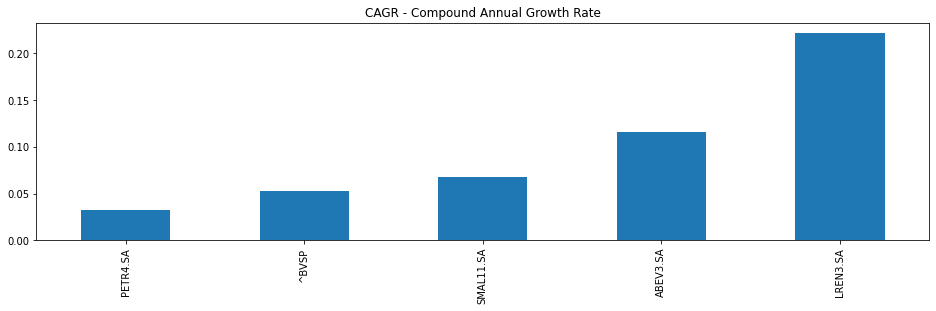

In [123]:
cagr.sort_values().plot(kind='bar', figsize=(16,4), title='CAGR - Compound Annual Growth Rate');

## Cálculo do log-retorno anual

In [124]:
p_yearly = p.resample('1Y').last()

In [125]:
r_yearly = np.log(p_yearly).diff()

In [126]:
r_yearly

,ABEV3.SA,LREN3.SA,PETR4.SA,SMAL11.SA,^BVSP
Date,,,,,
2010-12-31,NaN,NaN,NaN,NaN,NaN
2011-12-31,0.256645,-0.116638,-0.201035,-0.185372,-0.199791
2012-12-31,0.463163,0.532864,-0.072540,0.247952,0.071361
2013-12-31,0.049323,-0.239990,-0.114439,-0.162441,-0.168369
2014-12-31,-0.024551,0.247495,-0.468152,-0.189326,-0.029555
2015-12-31,0.185549,0.130812,-0.403473,-0.245949,-0.142856
2016-12-31,-0.048919,0.324638,0.797238,0.264418,0.328814
2017-12-31,0.288279,0.535422,0.079474,0.402997,0.237888
2018-12-31,-0.292565,0.191481,0.384958,0.072651,0.140043


## Cálculo da rentabilidade a partir do log-retorno anual

In [132]:
rentabilidade = 100 * np.exp(r_yearly.cumsum())

In [133]:
rentabilidade.iloc[0] = 100

In [136]:
rentabilidade

,ABEV3.SA,LREN3.SA,PETR4.SA,SMAL11.SA,^BVSP
Date,,,,,
2010-12-31,100.000000,100.000000,100.000000,100.000000,100.000000
2011-12-31,129.258629,88.990753,81.788360,83.079526,81.890196
2012-12-31,205.403976,151.622943,76.065505,106.457984,87.947479
2013-12-31,215.789118,119.271988,67.840271,90.496337,74.319313
2014-12-31,210.555755,152.765150,42.478735,74.887200,72.154967
2015-12-31,253.483674,174.114561,28.375625,58.558939,62.549600
2016-12-31,241.381992,240.892633,62.976944,76.283136,86.901378
2017-12-31,322.034691,411.485132,68.186206,114.142695,110.240242
2018-12-31,240.349561,498.325862,100.203189,122.743944,126.811918


<AxesSubplot:xlabel='Date'>

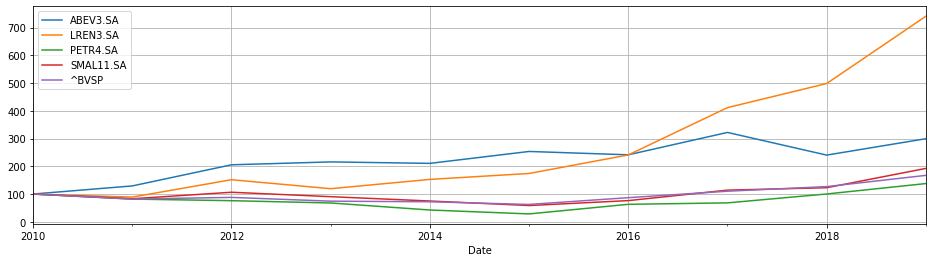

In [135]:
rentabilidade.plot(figsize=(16, 4), grid=True);